**Tugas Latihan Machine Learning : Customer Churn Prediction**

In [1]:
#Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier # No syntax error here. Check the preceding lines or try restarting your kernel.
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

In [2]:
#import dataset
df = pd.read_csv("/content/drive/MyDrive/colleb/ujsp/churn_telco_final.csv.csv")
#Tampilkan bentuk dari dataset
print(df.shape) # Changed df_load to df
#Tampilkan 5 data teratas
print(df.head()) # Changed df_load to df
#Tampilkan jumlah ID yang unik
print(df.customerID.nunique())

(7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Co

In [3]:
#import matplotlib dan seaborn
import matplotlib.pyplot as plt
import seaborn as sns

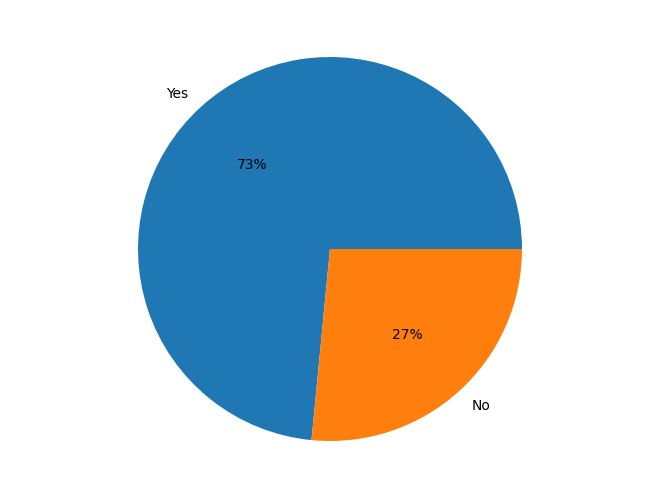

In [4]:
from matplotlib import pyplot as plt
import numpy as np
#Your codes here
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes', 'No']
# Replace 'df_load' with 'df'
churn = df.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

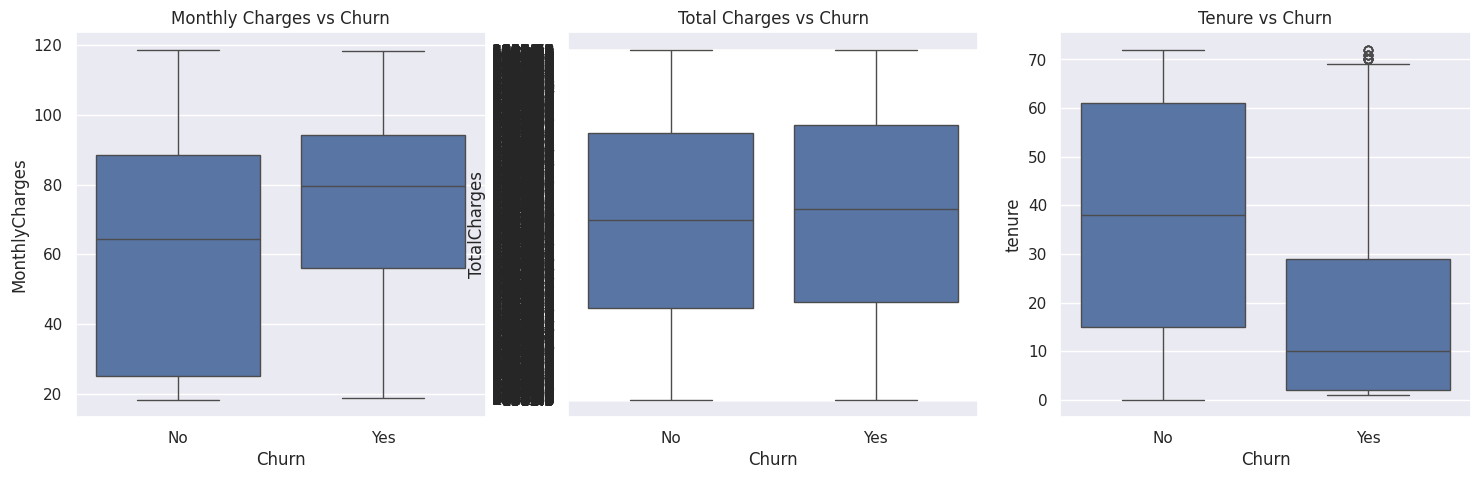

In [13]:
# Analisis Variabel Numerik
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y=df['MonthlyCharges'], x=df['Churn'], ax=axes[0])
sns.boxplot(y=df['TotalCharges'], x=df['Churn'], ax=axes[1])
sns.boxplot(y=df['tenure'], x=df['Churn'], ax=axes[2])
axes[0].set_title("Monthly Charges vs Churn")
axes[1].set_title("Total Charges vs Churn")
axes[2].set_title("Tenure vs Churn")
plt.show()

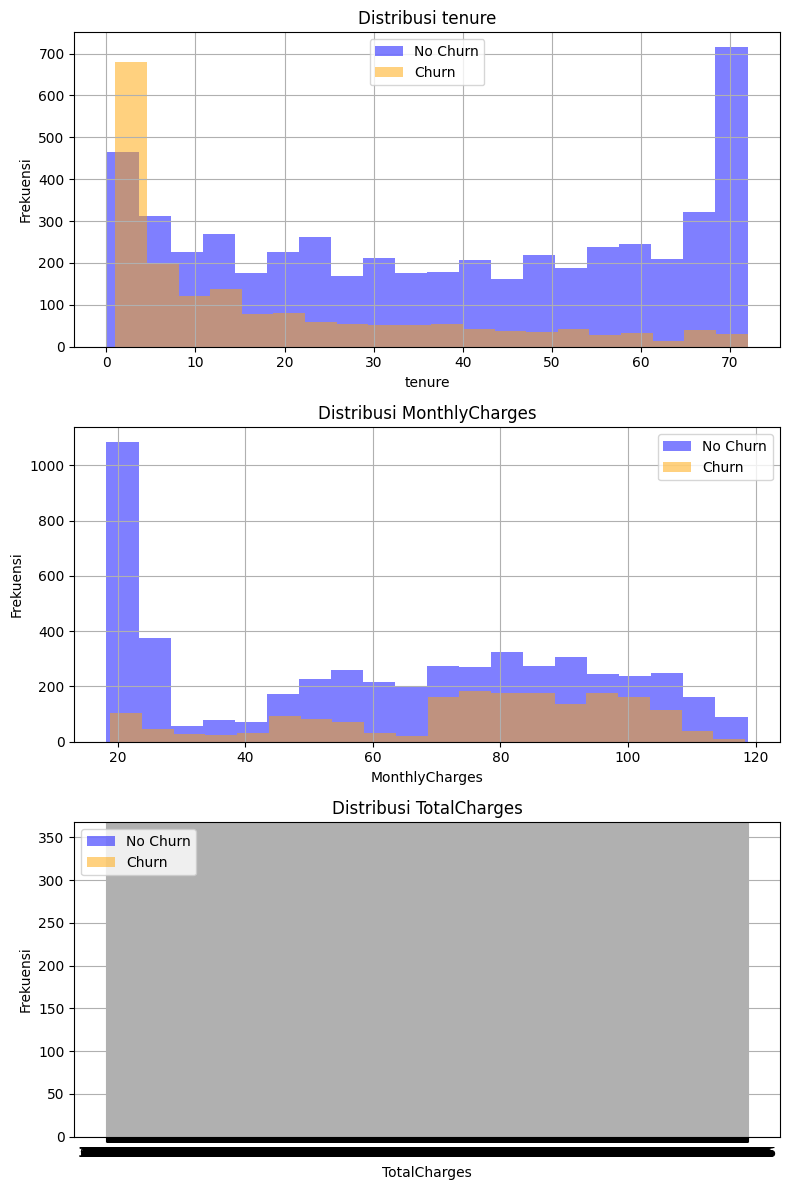

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Pilih fitur numerik yang akan divisualisasikan
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]

# Buat subplots
fig, ax = plt.subplots(len(numerical_features), figsize=(8, 12))

# Iterasi untuk setiap fitur numerik
for i, feature in enumerate(numerical_features):
    df[df.Churn == 'No'][feature].hist(bins=20, color='blue', alpha=0.5, ax=ax[i], label='No Churn')
    df[df.Churn == 'Yes'][feature].hist(bins=20, color='orange', alpha=0.5, ax=ax[i], label='Churn')

    ax[i].set_title(f'Distribusi {feature}')
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('Frekuensi')
    ax[i].legend()

# Tampilkan plot
plt.tight_layout()
plt.show()


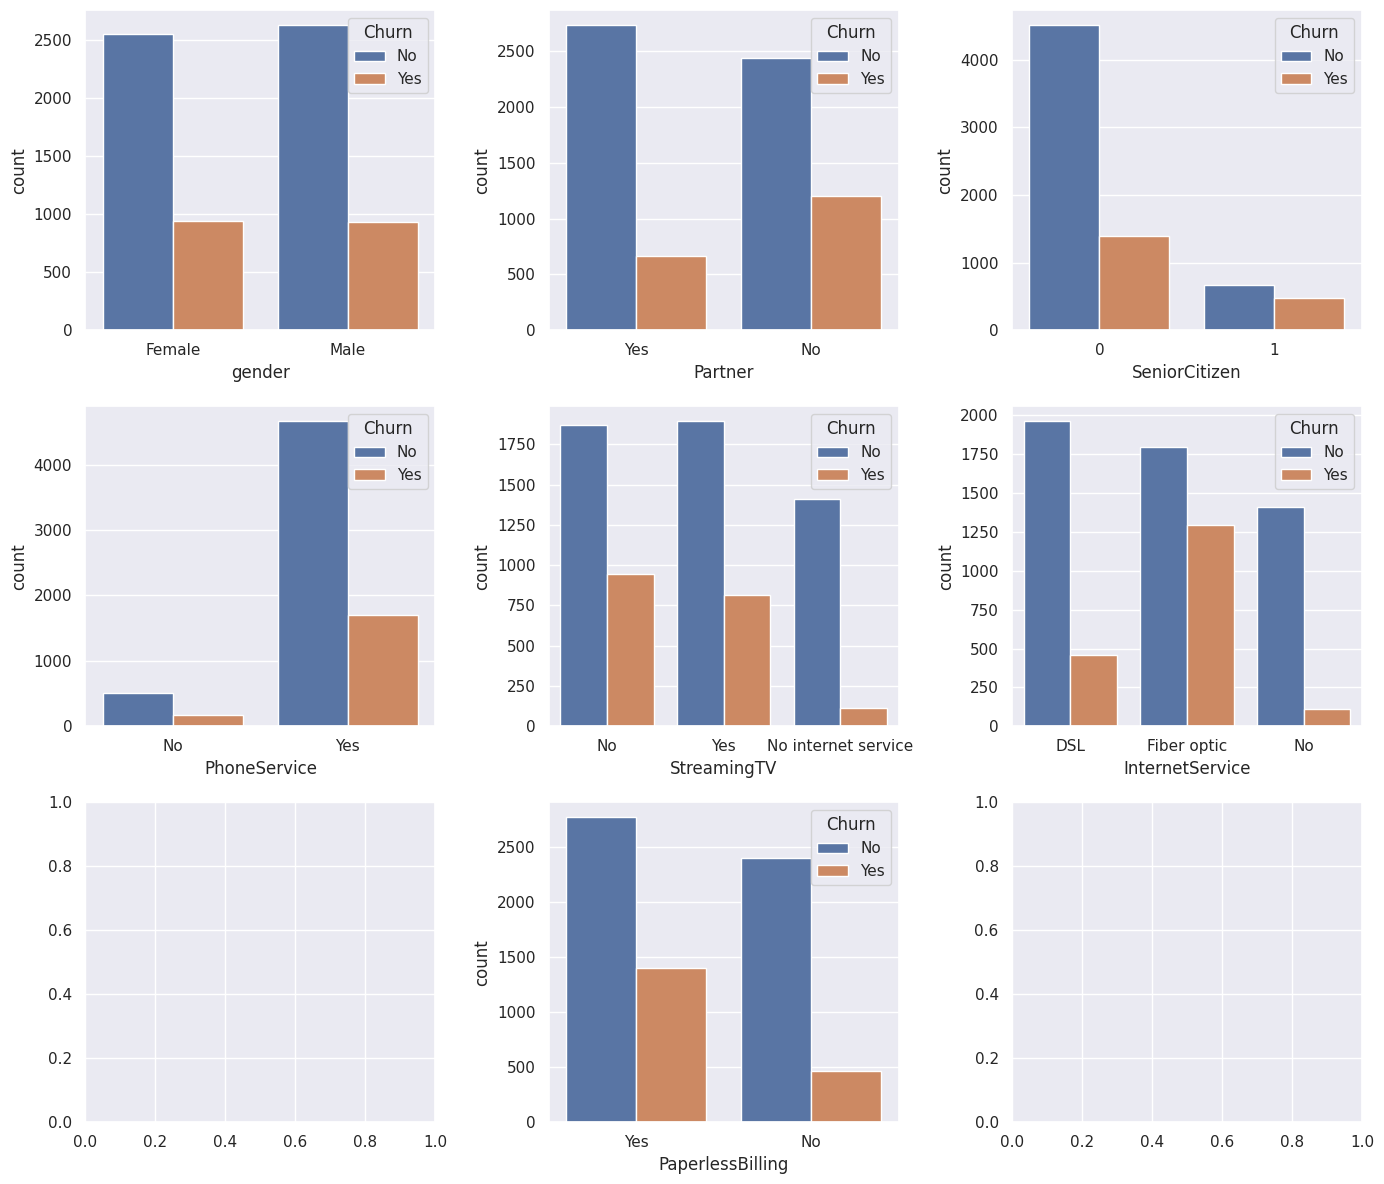

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
# Replace 'df_load' with 'df' in all sns.countplot calls
sns.countplot(data=df, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd

# Cek nama kolom yang tersedia
print(df.columns)

# Hapus kolom jika ada dalam dataset
columns_to_drop = [col for col in ["customerID", "UpdatedAt"] if col in df.columns]
cleaned_df = df.drop(columns=columns_to_drop, axis=1)

# Tampilkan hasil
print(cleaned_df.head())



Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2        

In [9]:
from sklearn.preprocessing import LabelEncoder
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number:
        continue
    # Perform encoding for each non-numeric column
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe()) # Fixed: changed 'cleaned df' to 'cleaned_df'

            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.504756       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7043.000000    7043.000000      7043.000000     7043.000000   
mean       0.903166       0.940508         0.872923        0.790004   
std        0.295752       0.948554         0.737796        0.859848   
min        0.000000       0.000

<ipython-input-9-28e3128384e6>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:
<ipython-input-9-28e3128384e6>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:
<ipython-input-9-28e3128384e6>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:
<ipython-input-9-28e3128384e6>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:
<ipython-input-9-28e3128384e6>:6: DeprecationWarning: Converting `np.inexact` or `np.flo

In [10]:
from sklearn.model_selection import train_test_split
# Predictor dan target
X = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df ['Churn']
# Splitting train and test
# Changed 'x' to 'X' in the train_test_split function call
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,',',
     'sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts (normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,',',
     'sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))


Jumlah baris dan kolom dari x_train adalah: (4930, 19) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4930,)
Prosentase Churn di data Training adalah:
Churn
0    0.737323
1    0.262677
Name: proportion, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2113, 19) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2113,)
Prosentase Churn di data Testing adalah:
Churn
0    0.728348
1    0.271652
Name: proportion, dtype: float64


In [11]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression().fit(x_train,y_train)
print('Model Logistic Regression yang terbentuk adalah: \n', log_model)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# Performansi Model Training - Menampilkan Metrics

from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the training set
y_train_pred = log_model.predict(x_train)

# Classification report
print("Classification Report Training Model (Logistic Regression):\n")
print(classification_report(y_train, y_train_pred))

# Confusion matrix
print("Confusion Matrix Training Model (Logistic Regression):\n")
print(confusion_matrix(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression):

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3635
           1       0.64      0.52      0.58      1295

    accuracy                           0.80      4930
   macro avg       0.74      0.71      0.72      4930
weighted avg       0.79      0.80      0.79      4930

Confusion Matrix Training Model (Logistic Regression):

[[3263  372]
 [ 621  674]]
